# Importing all the necessary libraries


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
import sklearn.ensemble as ske

In [5]:
#loading and reading 
titanic_data = pd.read_csv("train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# NULLVALUECLEANING 

In [6]:
titanic_data.isnull().values.any()

True

In [7]:
titanic_data.columns[titanic_data.isna().any()].to_list()

['Age', 'Cabin', 'Embarked']

In [8]:
#finding out null values
print("Age has ", 891 - (titanic_data['Age'].count()), "missing values")
print("Cabin has ", 891 - (titanic_data['Cabin'].count()), "missing values")
print("Embarked has ", 891- (titanic_data['Embarked'].count()), "missing values")

Age has  177 missing values
Cabin has  687 missing values
Embarked has  2 missing values


In [9]:
# drop 'Cabin' from the dataset because of the number of null values and 'Ticket' since we already have Pclass
titanic_data = titanic_data.drop(['Cabin','Ticket'], axis = 1)

In [10]:
# now remove all values with NaN as a value
titanic_data = titanic_data.dropna()

In [11]:
# from (891, 12) to (712, 10) clean data.
titanic_data.shape

(712, 10)

# GRAPHS  

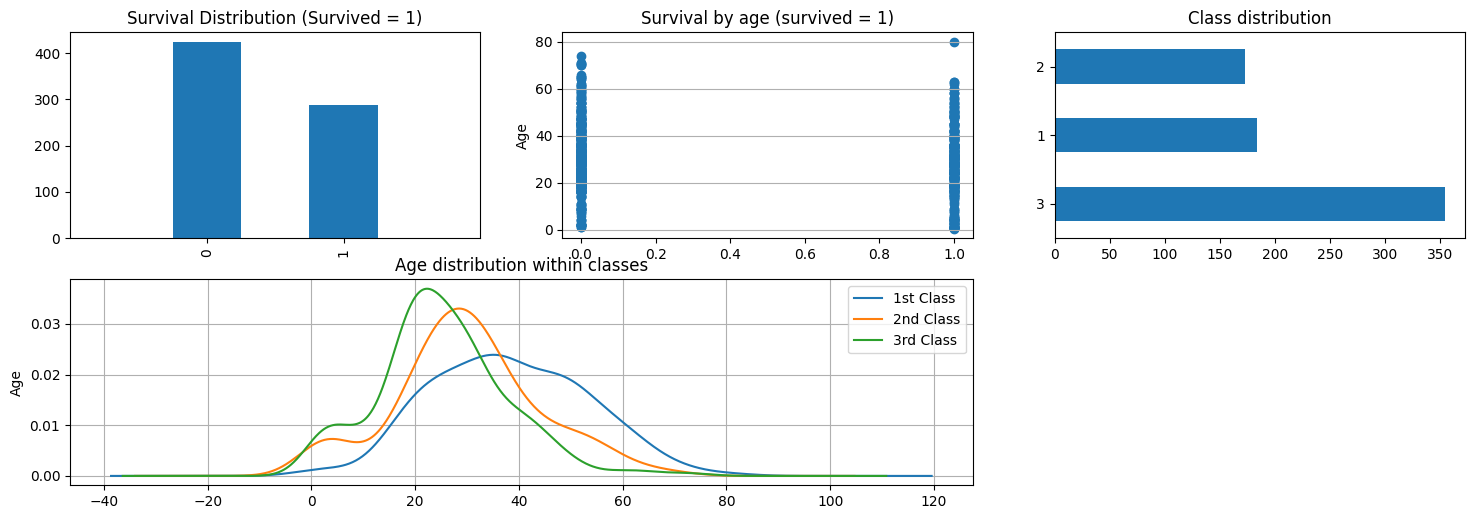

In [12]:
# graphically represent the data, side by side
# specify the parameters of our plot
fig = plt.figure(figsize = (18,6), dpi = 100)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 1

ax1 = plt.subplot2grid((2,3),(0,0))
# plot for those who survived vs died
titanic_data.Survived.value_counts().plot(kind = 'bar', alpha = alpha_bar_chart)
plt.title("Survival Distribution (Survived = 1)")
ax1.set_xlim(-1,2)

# Age vs survival
plt.subplot2grid((2,3),(0,1))
plt.scatter(titanic_data.Survived, titanic_data.Age)
plt.ylabel("Age")
plt.grid(b=True, axis = 'y')
plt.title("Survival by age (survived = 1)")

# plotting class distribution
ax3 = plt.subplot2grid((2,3), (0,2))
titanic_data.Pclass.value_counts().plot(kind = 'barh')
plt.title("Class distribution")

# plotting age distribution within classes
plt.subplot2grid((2,3),(1,0), colspan = 2)
titanic_data.Age[titanic_data.Pclass == 1].plot(kind = 'kde')
titanic_data.Age[titanic_data.Pclass == 2].plot(kind = 'kde')
titanic_data.Age[titanic_data.Pclass == 3].plot(kind = 'kde')
plt.legend(("1st Class", "2nd Class", "3rd Class"), loc = "best")
plt.ylabel("Age")
plt.title("Age distribution within classes")
plt.grid(b = True, axis = 'both')


From the Survival Distribution we can see that there are more people who died compared to those who survived. In the second graph, Survival by age, again less people survived in all age groups. In the 3rd graph: Class distribution, most number of people were in the 3rd class, followed by 1st then 2nd. And in the 4th graph, Age distribution within classes, most people in the 3rd class were likely to be between the ages of 20 and 25, 2nd class, ages 25 and 30, 1st class, ages 30 and 45.

So basically,we have  to predict who might have survived based on:

Age
Sex
Pclass(Travelling class)
Fare Price

(-1.0, 2.0)

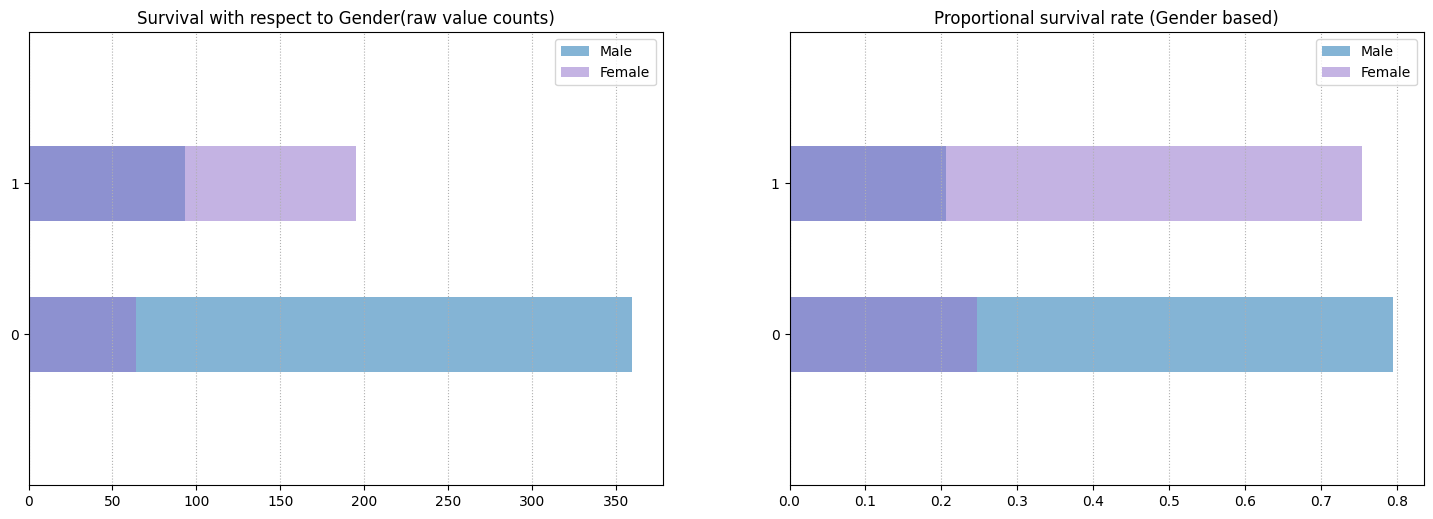

In [13]:
# replot survival distribution and breakdown the graph by gender.
fig = plt.figure(figsize = (18,6), dpi = 100)

df_male = titanic_data.Survived[titanic_data.Sex == 'male'].value_counts().sort_index()
df_female = titanic_data.Survived[titanic_data.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind = 'barh', label = 'Male', alpha = 0.55)
df_female.plot(kind = 'barh', label = 'Female', color = '#9575cd', alpha = 0.55)
plt.grid(b=True, axis = 'x', linestyle = 'dotted')
plt.legend(loc = 'best')
plt.title("Survival with respect to Gender(raw value counts)")
ax1.set_ylim(-1,2)

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind = 'barh', alpha = 0.55, label = "Male")
(df_female/float(df_female.sum())).plot(kind = 'barh', alpha = 0.55, label = "Female", color = '#9575cd')
plt.grid(b=True, axis = 'x', linestyle = 'dotted')
plt.title("Proportional survival rate (Gender based)")
plt.legend(loc = 'best')
ax2.set_ylim(-1,2)


We can conclude that women had a higher survival rate, as observed from the raw value graph. About 190 women vs 90 men survived and about 360 men vs 70 women died.

In the proportional graph, the rate of survival V death for women is 75% v 25%, whereas for men it's 21% v 79% respectively.

now we will be extracting more information by including Pclass

(-1.0, 2.0)

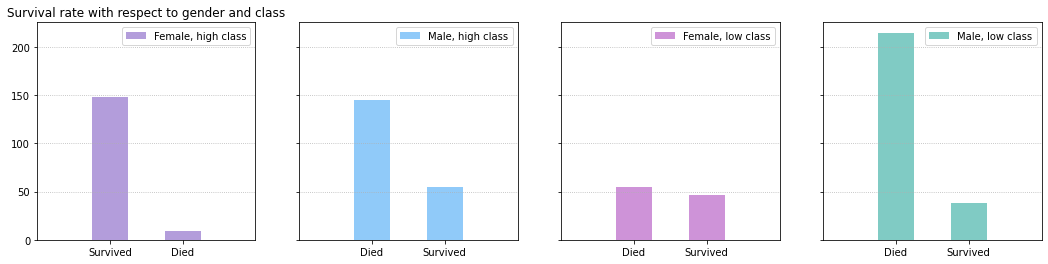

In [14]:
fig = plt.figure(figsize = (18,4))

ax1 = fig.add_subplot(141)
female_high = titanic_data.Survived[titanic_data.Sex == 'female'][titanic_data.Pclass != 3].value_counts()
female_high.plot(kind = 'bar', label = "Female, high class", color = '#b39ddb')
ax1.set_xticklabels(['Survived', 'Died'], rotation = 0)
ax1.set_xlim(-1, len(female_high))
plt.title("Survival rate with respect to gender and class")
plt.legend(loc = 'best')
plt.grid(b = True, axis = 'y', linestyle = 'dotted')

ax2 = fig.add_subplot(142, sharey = ax1)
male_high = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Pclass != 3].value_counts()
male_high.plot(kind = 'bar', label = "Male, high class", color = '#90caf9')
plt.legend(loc = 'best')
ax2.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.grid(b = True, axis = 'y', linestyle = 'dotted')
ax2.set_xlim(-1, len(male_high))


ax3 = fig.add_subplot(143, sharey = ax1)
female_low = titanic_data.Survived[titanic_data.Sex == 'female'][titanic_data.Pclass == 3].value_counts()
female_low.plot(kind = 'bar', label = 'Female, low class', color = '#ce93d8')
plt.legend(loc = 'best')
plt.grid(b = True, linestyle = 'dotted', axis = 'y')
ax3.set_xticklabels(["Died", 'Survived'], rotation = 0)
ax3.set_xlim(-1, len(female_low))

ax4 = fig.add_subplot(144, sharey = ax1)
male_low = titanic_data.Survived[titanic_data.Sex == 'male'][titanic_data.Pclass == 3].value_counts()
male_low.plot(kind = 'bar', label = 'Male, low class', color = '#80cbc4')
ax4.set_xticklabels(['Died','Survived'], rotation = 0)
plt.grid(b=True, linestyle = 'dotted', axis = 'y')
plt.legend(loc = 'best')
ax4.set_xlim(-1, len(male_low))


These graphs help giving insight into survival and death probabilities and rates.

For survival, we see that the highest rate of survival comes from women in the high-classes followed by men in the high classes, then women in the low class and lastly men in the low class.

For the death rate, we see that the highest rate of death came from men in the low class, followed by men in the high classes, then women in the low class and least amount of mortality was by women in the high classes.

Passengers were more likely to survive if they were in the highers classes, moreso if they were women; more likely to die if they were in the low class, more so if they were men.

# SML(SUPERVISEDMACHINELEARNING)
The challenge requires us to predict a binary outcome i.e. whether one will survive or die, therefore logistic regression is best for this.

In [15]:

# here '~' is used to mean '='. The C() is written to let the regression know the variables are categorical.
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp +C(Embarked)'
results = {}

In [16]:
# create a regression friendly dataframe:
y,x = dmatrices(formula, data = titanic_data, return_type = 'dataframe')

# instantiate the model
model = sm.Logit(y,x)

In [17]:
# fit the model
res = model.fit()

# predict
ypredict = res.predict(x)

# save the results for outputting predictions later
results['Logit'] = [res, formula]
res.summary

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x000002A6DD9F1370>>

Text(0.5, 1.0, 'Logit Residuals')

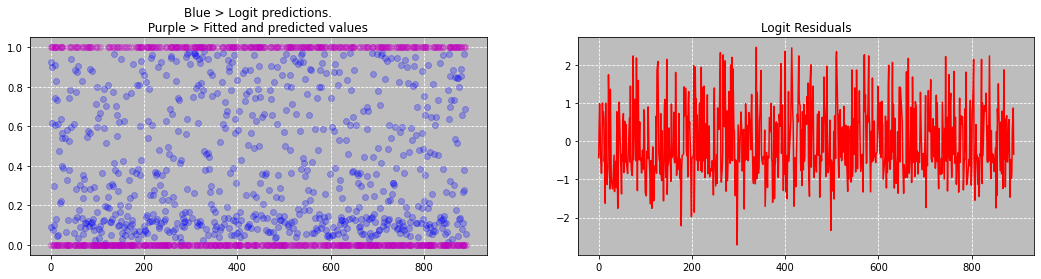

In [18]:
# plot predictions vs actual
plt.figure(figsize = (18,4))
plt.subplot(121, facecolor="#bdbdbd")

plt.plot(x.index, ypredict, 'bo', x.index, y, 'mo', alpha = .25)
plt.grid(color = '#ffffff', linestyle = 'dashed')
plt.title("Blue > Logit predictions.\n Purple > Fitted and predicted values ")

# residuals
ax2 = plt.subplot(122, facecolor = '#bdbdbd')
plt.plot(res.resid_dev, 'r-')
plt.grid(color = '#ffffff', linestyle = 'dashed')
plt.title("Logit Residuals")

In [29]:
#READINGTESTDATA

In [19]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:

test_data.shape

(418, 11)

In [21]:
results

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x2a6c9bbbf70>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp +C(Embarked)']}

# USING RANDOM FOREST
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
One big advantage of random forest is, that it can be used for both classification and regression problems.it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [22]:

y,x = dmatrices(formula, data = titanic_data, return_type='dataframe')
y = np.asarray(y).ravel()
results_rf = ske.RandomForestClassifier(n_estimators = 100).fit(x,y)
score = results_rf.score(x,y)
print("Accuracy = ", (score*100).round(2), "%")

Accuracy =  93.4 %


# THE RANDOM FOREST GIVES US 93.4% ACCURACY

In [23]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ske

In [24]:
Y_train = titanic_data['Survived']
features = ['Pclass', 'Sex', 'SibSp', 'Parch']

In [25]:
X_train = pd.get_dummies(titanic_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators= 100, max_depth = 5, random_state = 1)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predicted})
output.to_csv('GROUNDTRUTH.csv', index = False)
pd.read_csv('GROUNDTRUTH.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
